### Ultrasound_Manufacturing assembly line---- DIMENSIONALITY REDUCTION

problem statement:- There are more than 550 testing points in USG assembly line.
- (1)for cost cutting & To reduce the Testing time - 
we need only highly significant testing points(columns)
work on feature engineering & Dimensionality reduction.
- (2)Imp:-We required the original identity of the testing points also after dimensionality reduction.
- Target final testing points<=100

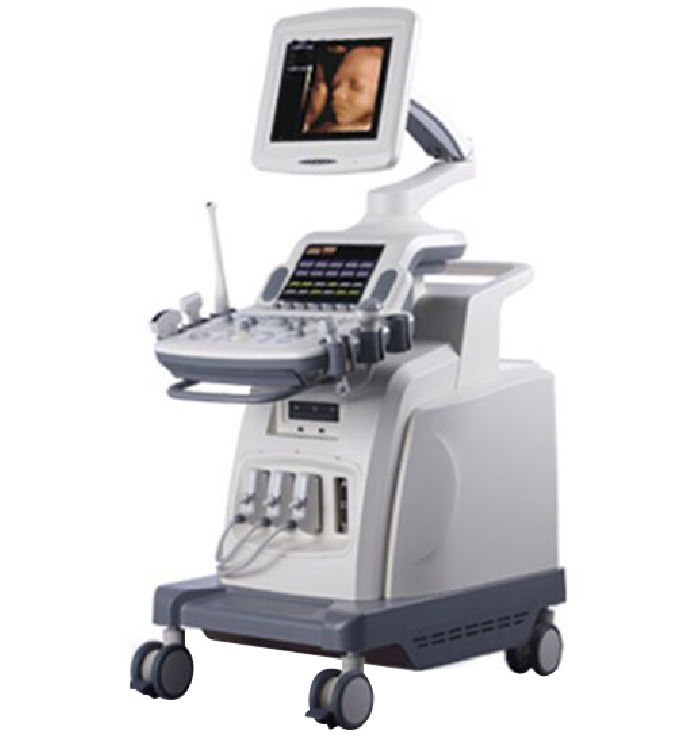

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
original_data = pd.read_csv("Ultrasound_1.csv")

In [3]:
df = original_data.copy()

In [4]:
# Finding the missing values and sorting the rows in a descinding order by number of nulls

df.isnull().sum().sort_values(ascending = False)

293          1439
292          1439
157          1439
158          1439
358          1351
             ... 
120             0
156             0
495             0
494             0
Pass/Fail       0
Length: 577, dtype: int64

In [5]:
high_null = df.isnull().sum() / len(df)
high_null.sort_values(ascending = False)

293          0.912492
292          0.912492
157          0.912492
158          0.912492
358          0.856690
               ...   
120          0.000000
156          0.000000
495          0.000000
494          0.000000
Pass/Fail    0.000000
Length: 577, dtype: float64

In [9]:
# Drop columns having more than 50% nulls

high_missing = high_null[high_null >= 0.50].index

In [10]:
# This gives the column heads of all columns having 50% or more nulls

high_missing

Index(['72', '73', '85', '109', '110', '111', '157', '158', '220', '244',
       '245', '246', '292', '293', '345', '346', '358', '382', '383', '384',
       '492', '516', '517', '518', '578', '579', '580', '581'],
      dtype='object')

In [8]:
len(high_missing)

28

In [11]:
df = df.drop(high_missing, axis = 1)

In [13]:
df.shape

(1577, 549)

In [14]:
# Check remaining nulls after dropping some columns

df.isnull().sum().sum()

11633

In [15]:
# Impute remaining nulls with median

df = df.fillna(df.median())
df.isnull().sum().sum()

0

In [18]:
 # Finding columns with only one unique variable (Zero variance columns)
    
unique = df.apply(pd.Series.nunique)
unique

0            1489
1            1497
2             502
3             512
4             502
             ... 
586           319
587           256
588           119
589           602
Pass/Fail       2
Length: 549, dtype: int64

In [19]:
one_unique = unique[unique == 1].index
one_unique

Index(['5', '42', '141', '178', '179', '186', '226', '229', '230', '231',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=104)

In [20]:
df2 = df.drop(one_unique, axis = 1)
df2.shape

(1577, 445)

In [65]:
df2["Pass/Fail"] = df2["Pass/Fail"].map({-1:0, 1:1})

In [66]:
# Splitting the data to dependent and independent

X = df2.drop(["Pass/Fail"], axis = 1)
Y = df2["Pass/Fail"]

In [23]:
# Scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [67]:
scale = MinMaxScaler()
x_scaled = scale.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = X.columns)
x_scaled.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,0.376148,0.291207,0.534140,0.286993,0.000482,0.419322,0.906716,0.565965,0.375682,0.393629,...,0.006871,0.006471,0.771875,0.014611,0.022505,0.013765,0.307435,0.110821,0.119565,0.079433
1,0.504934,0.533060,0.493336,0.293062,0.000530,0.454832,0.907463,0.640524,0.410756,0.296928,...,0.009061,0.083901,0.703125,0.019338,0.025440,0.018469,0.331662,0.348110,0.344203,0.178019
2,0.279281,0.484797,0.475051,0.291624,0.000509,0.467237,0.909701,0.785991,0.249415,0.348123,...,0.004566,0.116911,0.503125,0.016330,0.019569,0.016065,0.331662,0.348110,0.344203,0.178019
3,0.353313,0.483415,0.578696,0.494203,0.000799,0.384471,0.924627,0.595187,0.441933,0.417520,...,0.011762,0.108377,0.671875,0.016760,0.020548,0.016062,0.258145,0.192960,0.159420,0.173988
4,0.361322,0.531766,0.474658,0.316842,0.000556,0.399019,0.907463,0.459175,0.353858,0.440273,...,0.002694,0.102326,0.643750,0.020413,0.022505,0.019532,0.258145,0.192960,0.159420,0.173988


In [25]:
# Multi-collinearity

corr_matrix = x_scaled.corr(method = "spearman")
corr_matrix

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,-0.174254,1.000000,0.011939,-0.024861,0.026839,-0.004108,0.014045,0.034055,0.025961,0.022249,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
2,-0.004933,0.011939,1.000000,0.429100,0.103320,-0.180483,-0.441057,0.033068,0.009325,0.053804,...,0.017690,-0.078017,-0.011130,-0.004858,0.006688,-0.005072,-0.047422,-0.038042,-0.042075,-0.010301
3,0.000871,-0.024861,0.429100,1.000000,0.227607,-0.598326,0.160051,-0.039619,0.065955,0.042285,...,0.062947,0.001305,-0.003874,-0.024560,-0.031548,-0.024818,0.016755,-0.046960,-0.045129,-0.061878
4,-0.003782,0.026839,0.103320,0.227607,1.000000,-0.165679,0.119434,0.018712,0.008362,-0.009422,...,0.064258,0.055979,0.042790,0.007499,-0.001365,0.006475,0.012536,0.014989,0.019185,0.017437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,-0.020311,0.030342,-0.005072,-0.024818,0.006475,0.022376,-0.022231,-0.007609,-0.036130,0.029054,...,-0.025409,-0.028586,0.005726,0.999601,0.895902,1.000000,-0.019582,0.012017,0.020354,0.039165
586,0.013071,-0.011229,-0.047422,0.016755,0.012536,-0.021522,0.058340,0.006057,0.015694,0.015137,...,0.028346,0.032950,-0.023905,-0.020187,-0.022131,-0.019582,1.000000,0.051010,0.035499,-0.579792
587,-0.009036,0.019134,-0.038042,-0.046960,0.014989,0.010952,-0.022118,0.048744,0.045708,0.066190,...,0.028369,0.009631,-0.023467,0.011613,0.017563,0.012017,0.051010,1.000000,0.975170,0.591619
588,-0.012880,0.005577,-0.042075,-0.045129,0.019185,0.019707,-0.023402,0.053185,0.044424,0.061754,...,0.022087,0.005590,-0.018467,0.020245,0.026282,0.020354,0.035499,0.975170,1.000000,0.593667


<AxesSubplot:>

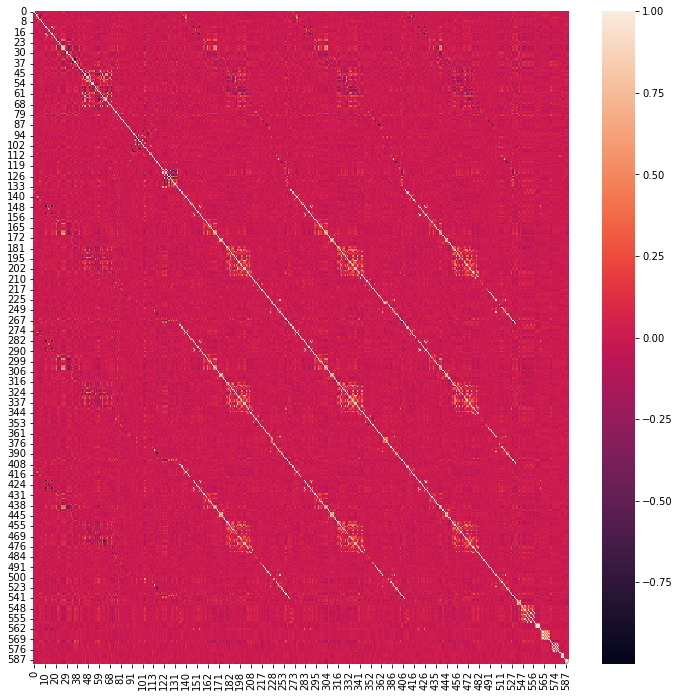

In [27]:
# Correlation heatmap

plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix)

No information can be gathered from this heatmap as the number of columns to compare are too many. To overcome this, we will extract only the upper triangle so only half the heatmap is shown.

In [30]:
# Upper triangle matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

In [31]:
upper

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,NaN,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,NaN,NaN,0.011939,-0.024861,0.026839,-0.004108,0.014045,0.034055,0.025961,0.022249,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
2,NaN,NaN,NaN,0.429100,0.103320,-0.180483,-0.441057,0.033068,0.009325,0.053804,...,0.017690,-0.078017,-0.011130,-0.004858,0.006688,-0.005072,-0.047422,-0.038042,-0.042075,-0.010301
3,NaN,NaN,NaN,NaN,0.227607,-0.598326,0.160051,-0.039619,0.065955,0.042285,...,0.062947,0.001305,-0.003874,-0.024560,-0.031548,-0.024818,0.016755,-0.046960,-0.045129,-0.061878
4,NaN,NaN,NaN,NaN,NaN,-0.165679,0.119434,0.018712,0.008362,-0.009422,...,0.064258,0.055979,0.042790,0.007499,-0.001365,0.006475,0.012536,0.014989,0.019185,0.017437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.019582,0.012017,0.020354,0.039165
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051010,0.035499,-0.579792
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975170,0.591619
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593667


<AxesSubplot:>

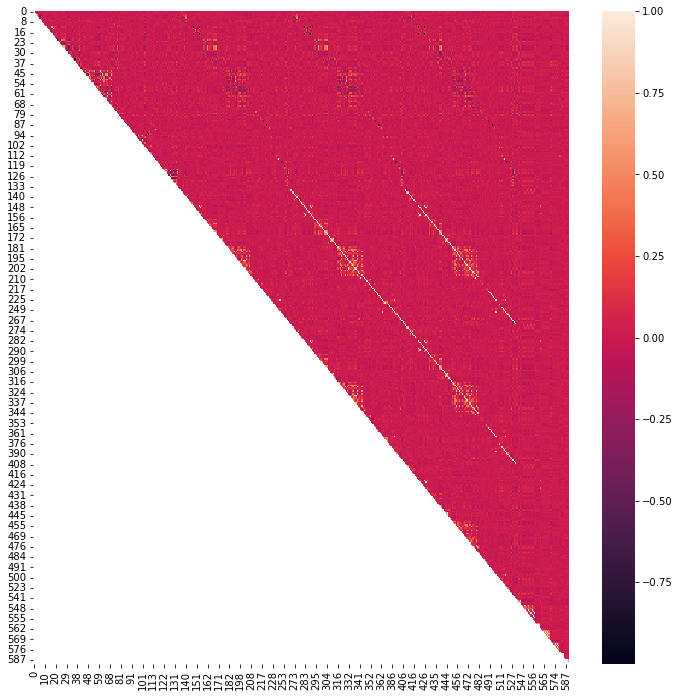

In [32]:
# Correlation upper triangle heatmap

plt.figure(figsize = (12, 12))
sns.heatmap(upper)

In [36]:
neg_corr = [column for column in upper.columns if any(upper[column] <= -0.8)]
pos_corr = [column for column in upper.columns if any(upper[column] >= 0.8)]

In [37]:
print("High -ve correlation:", neg_corr)
print("High +ve correlation:", pos_corr)

High -ve correlation: ['36', '62', '96', '98', '104', '105', '106', '130', '147', '153', '222', '254', '282', '288', '360', '392', '420', '426', '494', '526']
High +ve correlation: ['18', '30', '46', '50', '54', '60', '62', '65', '66', '70', '101', '123', '124', '127', '153', '154', '174', '201', '202', '249', '250', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '385', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '412', '4

In [38]:
total_corr = neg_corr + pos_corr
len(total_corr)

225

In [39]:
len(neg_corr + pos_corr)

225

In [40]:
total_corr

['36',
 '62',
 '96',
 '98',
 '104',
 '105',
 '106',
 '130',
 '147',
 '153',
 '222',
 '254',
 '282',
 '288',
 '360',
 '392',
 '420',
 '426',
 '494',
 '526',
 '18',
 '30',
 '46',
 '50',
 '54',
 '60',
 '62',
 '65',
 '66',
 '70',
 '101',
 '123',
 '124',
 '127',
 '153',
 '154',
 '174',
 '201',
 '202',
 '249',
 '250',
 '270',
 '271',
 '272',
 '273',
 '274',
 '275',
 '277',
 '278',
 '279',
 '280',
 '281',
 '282',
 '283',
 '285',
 '286',
 '287',
 '288',
 '289',
 '290',
 '291',
 '294',
 '295',
 '296',
 '297',
 '298',
 '299',
 '300',
 '301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '316',
 '317',
 '318',
 '319',
 '320',
 '321',
 '323',
 '324',
 '331',
 '332',
 '333',
 '334',
 '335',
 '337',
 '338',
 '339',
 '340',
 '341',
 '342',
 '343',
 '344',
 '347',
 '348',
 '349',
 '350',
 '351',
 '352',
 '353',
 '354',
 '355',
 '356',
 '357',
 '359',
 '360',
 '361',
 '362',
 '363',
 '365',
 '366',
 '376',
 '377',
 '385',
 '386',
 '387',
 '388',
 '389',
 '390'

In [41]:
# Dropping high collinear columns

x_scaled1 = x_scaled.drop(total_corr, axis = 1)

In [42]:
x_scaled1.shape

(1577, 229)

In [46]:
# Check the VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif10 = pd.DataFrame()
vif10["Column_name"] = x_scaled1.columns

In [48]:
vif10["VIF_value"] = [variance_inflation_factor(x_scaled1.values, i)for i in range(x_scaled1.shape[1])]

In [49]:
vif10

,Column_name,VIF_value
0,0,18.923151
1,1,23.185157
2,2,38.830809
3,3,32.990717
4,4,28657.358668
...,...,...
224,582,59.911051
225,583,1.928821
226,586,21.390412
227,587,6.014931


In [50]:
high_vif10 = vif10[vif10["VIF_value"] > 10]

In [51]:
high_vif10.shape

(149, 2)

In [52]:
# We are not using the VIF approach

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled1, Y, test_size = 0.2, random_state = 2, stratify = Y)

In [69]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = rf.predict(x_test)

In [71]:
accuracy_score(y_test, y_pred)

0.9367088607594937

In [72]:
confusion_matrix(y_test, y_pred)

array([[295,   0],
       [ 20,   1]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.05      0.09        21

    accuracy                           0.94       316
   macro avg       0.97      0.52      0.53       316
weighted avg       0.94      0.94      0.91       316



This model is not very good because the recall value for class "1" is very low. Hence, it is unable to predict class "1" at all.